<center> <h1>Αναγνώριση Προτύπων - 2η Εργαστηριακή Άσκηση</h1> </center>

---

<center> <h2>Θέμα: Αναγνώριση φωνής με Κρυφά Μαρκοβιανά Μοντέλα και Αναδρομικά Νευρωνικά Δίκτυα</h2> </center>
<center> <h2>ΣΧΟΛΗ: ΣΗΜΜΥ</h2> </center>
<img src="pyrforos-digamma.png" width="100">

Ονοματεπώνυμο | Αριθμός Μητρώου
------------ | -------------
Γιάννης Πιτόσκας | 03115077
Αντώνης Παπαοικονόμου | 03115140

In [1]:
!pip3 install --upgrade pip
!pip3 install scikit-learn --upgrade
!pip3 install numpy --upgrade
!pip3 install --upgrade joblib
!pip3 install seaborn
!pip3 install librosa
!pip3 install inflect
!pip3 install word2number
!pip3 install pomegranate

Requirement already up-to-date: pip in c:\python36\lib\site-packages (19.3.1)
Requirement already up-to-date: scikit-learn in c:\python36\lib\site-packages (0.22)
Requirement already up-to-date: numpy in c:\python36\lib\site-packages (1.18.0)
Requirement already up-to-date: joblib in c:\python36\lib\site-packages (0.14.1)


# Προπαρασκευή 2ου Εργαστηρίου:

## Βήμα 1
Χρησιμοποιώντας το πρόγραμμα `Praat` για την ανάλυση των αρχείων ήχου έχουμε:

In [2]:
import subprocess
import os

data_path = os.path.dirname("./pr_lab2_2019-20_data/")

def usePraat(file, text):
    try:
        subprocess.call(["/Applications/Praat.app/Contents/MacOS/Praat", "--open", file])
    except OSError as e:
        if e.errno == errno.ENOENT:
            # handle file not found error
            print("Please download Praat and use the installation path when calling it")
        else:
            # Something else went wrong while trying to run
            print("An error occured")
            raise
            
# usePraat(data_path + "/onetwothree1.wav", "one two three")
# usePraat(data_path + "/onetwothree8.wav", "one two three")

<img src="pitch_mean_onetwothree1.png">
<img src="pitch_mean_onetwothree8.png">
<img src="formants_onetwothree1.png">
<img src="formants_onetwothree8.png">

999.7624910757692 Hz (mean F1 in SELECTION)<br>
2568.2020920385485 Hz (mean F2 in SELECTION)<br>
3763.962970328683 Hz (mean F3 in SELECTION)<br>
<br>
1522.7387179790562 Hz (mean F1 in SELECTION)<br>
2958.5714711553173 Hz (mean F2 in SELECTION)<br>
3924.813236998355 Hz (mean F3 in SELECTION)<br>
<br>
1564.9136738911895 Hz (mean F1 in SELECTION)<br>
3106.0191007879434 Hz (mean F2 in SELECTION)<br>
3908.220816228914 Hz (mean F3 in SELECTION)<br>
<br>
<br>
579.574899251275 Hz (mean F1 in SELECTION)<br>
1806.3230037579995 Hz (mean F2 in SELECTION)<br>
2847.797227900949 Hz (mean F3 in SELECTION)<br>
<br>
530.4466184919183 Hz (mean F1 in SELECTION)<br>
1786.186919057703 Hz (mean F2 in SELECTION)<br>
2801.8758790729344 Hz (mean F3 in SELECTION)<br>
<br>
494.06899004212613 Hz (mean F1 in SELECTION)<br>
2096.0501422577026 Hz (mean F2 in SELECTION)<br>
2775.4912341476625 Hz (mean F3 in SELECTION)<br>

## Βήμα 2
Εκτός από τις 3 λίστες της εκφώνησης (αρχεία ήχου, ομιλιτές και τα ψηφία) θα χρειαστούμε και το sample rate

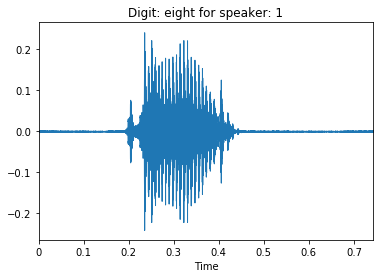

In [4]:
import os
import re
import numpy as np
import librosa
import IPython.display
import librosa.display
import matplotlib.pyplot as plt


digits_dir = data_path + "/digits/"

def dataLoader(path):
    wavs = []
    speakers = []
    digits = []

    for filename in os.listdir(path):
        if filename.endswith(".wav"):
            
            wav, sr = librosa.load(os.path.join(path, filename))
            wavs.append(wav)
            
            # split characters from numbers
            file = re.split('(\d+)',filename)
            speakers.append(int(file[1]))
            digits.append(file[0])
    
    return wavs, speakers, digits, sr

wavs, speakers, digits, sr = dataLoader(digits_dir)

# Print example
librosa.display.waveplot(wavs[0], sr=sr)
plt.title("Digit: "+str(digits[0])+" for speaker: "+str(speakers[0]))
IPython.display.Audio(wavs[0], rate=sr)

## Βήμα 3
Για τα `Mel-Frequency Cepstral Coefficients` έχουμε:

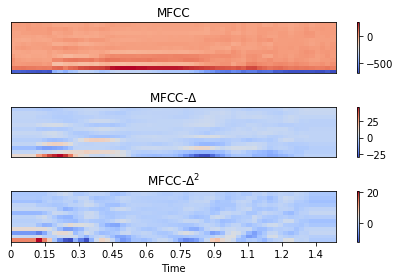

In [6]:
mfccs = []
mfcc_deltas = []
mfcc_delta_deltas = []

for wav in wavs:
    mfcc = librosa.feature.mfcc(y=wav, n_mfcc=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
    mfcc_delta = librosa.feature.delta(mfcc, order=1)
    mfcc_delta_delta = librosa.feature.delta(mfcc, order=2)
    mfccs.append(mfcc)
    mfcc_deltas.append(mfcc_delta)
    mfcc_delta_deltas.append(mfcc_delta_delta)

    
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc)
plt.title('MFCC')
plt.colorbar()
plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc_delta)
plt.title(r'MFCC-$\Delta$')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc_delta_delta, x_axis='time')
plt.title(r'MFCC-$\Delta^2$')
plt.colorbar()
plt.tight_layout()
plt.show()

## Βήμα 4
Για $n_1 = 4$, $n_2 = 3$ έχουμε τα παρακάτω ιστογράμματα:

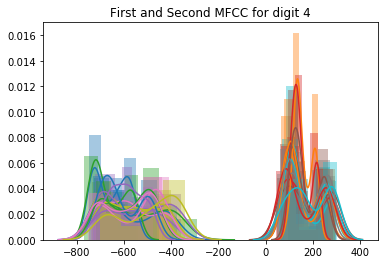

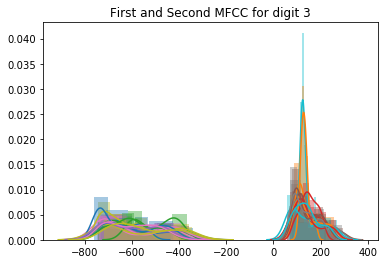

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import inflect

n1 = 4
n2 = 3
s1 = inflect.engine().number_to_words(n1)
s2 = inflect.engine().number_to_words(n2)

for index in range(len(wavs)):
    if digits[index] == s1:
        ax = sns.distplot(mfccs[index][0])
        bx = sns.distplot(mfccs[index][1])
plt.title("First and Second MFCC for digit " + str(n1))
plt.show()

for index in range(len(wavs)):
    if digits[index] == s2:
        ax = sns.distplot(mfccs[index][0])
        bx = sns.distplot(mfccs[index][1])
plt.title("First and Second MFCC for digit " + str(n2))
plt.show()

>Όπως παρατηρούμε και γραφικά, οι τιμές των πρώτων συντελεστών έχουν μεγαλύτερη απόκλιση απότι αυτές των δεύτερων

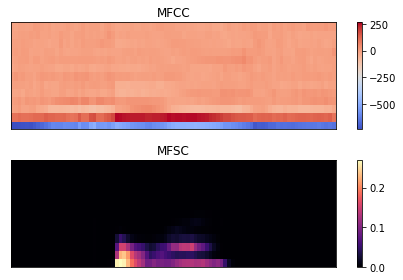

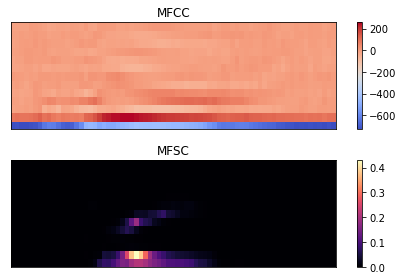

In [9]:
import librosa.display
import random

rand_sp_1 = random.randint(1, len(set(speakers)))
rand_sp_2 = random.randint(1, len(set(speakers)))
while(rand_sp_2 == rand_sp_1):
    rand_sp_2 = random.randint(1, len(set(speakers)))

for index in range(len(wavs)):
    if speakers[index] == rand_sp_1:
        if digits[index] == s1:
            mfcc = librosa.feature.mfcc(y=wavs[index], n_mfcc=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            mfsc = librosa.feature.melspectrogram(y=wavs[index], n_mels=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            plt.subplot(2, 1, 1)
            librosa.display.specshow(mfcc)
            plt.title('MFCC')
            plt.colorbar()
            plt.subplot(2, 1, 2)
            librosa.display.specshow(mfsc)
            plt.title('MFSC')
            plt.colorbar()
            plt.tight_layout()
            plt.show()

    if speakers[index] == rand_sp_2:
        if digits[index] == s2:
            mfcc = librosa.feature.mfcc(y=wavs[index], n_mfcc=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            mfsc = librosa.feature.melspectrogram(y=wavs[index], n_mels=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            plt.subplot(2, 1, 1)
            librosa.display.specshow(mfcc)
            plt.title('MFCC')
            plt.colorbar()
            plt.subplot(2, 1, 2)
            librosa.display.specshow(mfsc)
            plt.title('MFSC')
            plt.colorbar()
            plt.tight_layout()
            plt.show()

>Παρατηρούμε πως δεν έχουμε correlation όταν δεν έχουμε εφαρμόσει τον `DCT` καθώς και το οτι στην κλίμακα των `MFSCs` η πληροφορία είναι συμπυκνωμένη. Επομένως, η χρήση των `MFCCs` είναι η πιο επιθυμητή

## Βήμα 5

Ενώνοντας τις λίστες των `mfccs`, `deltas` και `delta-deltas` και βρίσκοντας την μέση τιμή παίρνουμε:

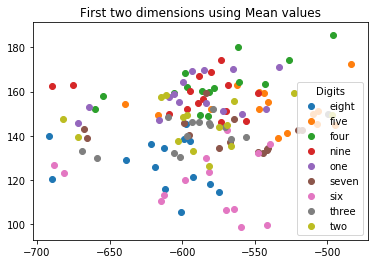

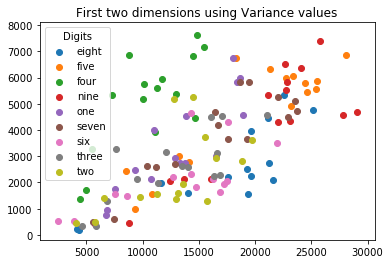

In [10]:
from word2number import w2n

digit_nums = []

for word in digits:
    digit_nums.append(w2n.word_to_num(word))

features = []
means = []
variances = []

for i in range(len(wavs)):
    features.append(np.concatenate((mfccs[i], mfcc_deltas[i], mfcc_delta_deltas[i])))
    means.append(np.mean(features[i], axis=1))
    variances.append(np.var(features[i], axis=1))


fig1, ax = plt.subplots()

group = np.array(digits)
scatter_x = np.array(means)
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix, 0], scatter_x[ix, 1], label = g)

ax.legend(loc="best", title="Digits")
plt.title("First two dimensions using Mean values")


fig2, bx = plt.subplots()

group = np.array(digits)
scatter_x = np.array(variances)
for g in np.unique(group):
    ix = np.where(group == g)
    bx.scatter(scatter_x[ix, 0], scatter_x[ix, 1], label = g)

bx.legend(loc="best", title="Digits")
plt.title("First two dimensions using Variance values")

plt.show()

>Παρατηρούμε πως δεν υπάρχει κάποιος ευκρινής διαχωρισμός στα `means`, με την ομαδοποίηση στα `variances` να είναι κάπως καλύτερη

## Βήμα 6
Ενώνοντας τους πίνακες των μέσων τιμών και των διασπορών και για μείωση των διαστάσεων σε 2 έχουμε χρησιμοποιώντας το `Principal Conponent Analysis`:

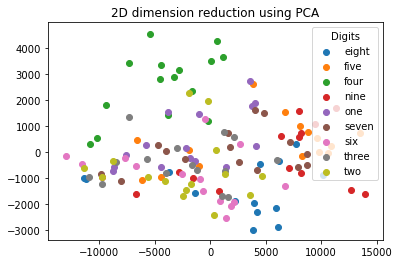

In [13]:
import numpy as np
from sklearn.decomposition import PCA

mean_and_var = []

for i in range(len(wavs)):
    mean_and_var.append(np.concatenate((means[i], variances[i])))

pca2 = PCA(n_components=2)
principalComponents2D = pca2.fit_transform(mean_and_var)


fig1, ax = plt.subplots()

group = np.array(digits)
scatter_x = np.array(principalComponents2D)
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix, 0], scatter_x[ix, 1], label = g)

ax.legend(loc="best", title="Digits")
plt.title("2D dimension reduction using PCA")

plt.show()

Στην συνέχεια για 3 διαστάσεις έχουμε πάλι με `PCA`:

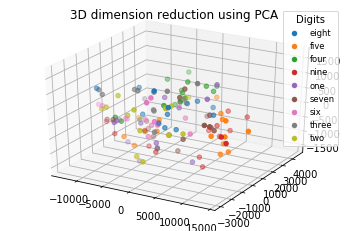

In [12]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
principalComponents3D = pca3.fit_transform(mean_and_var)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

group = np.array(digits)
scatter_x = np.array(principalComponents3D)
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix, 0], scatter_x[ix, 1], scatter_x[ix, 2], label = g)

ax.legend(loc="best", title="Digits", fontsize = 'small')
plt.title("3D dimension reduction using PCA")

plt.show()

>Η ομαδοποίηση κυρίως στις 2 διαστάσεις αλλά και στις 3 παρουσιάζει σημαντική βελτίωση σε σχέση με τα προηγούμενα αποτελέσματα

## Βήμα 7
Χωρίζοντας τα δεδομένα σε `train` και `test` με ποσοστά $70\% - 30\%$ αντίστοιχα, αφού τα κανονικοποιήσουμε έχουμε:

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

norm_features = StandardScaler().fit_transform(mean_and_var)

X_train, X_test, y_train, y_test = train_test_split(norm_features, digit_nums, test_size=0.30, shuffle=True)

Για τον ταξινομητή Naive Bayes έχουμε από την πρώτη εργαστηριακή άσκηση:

In [13]:
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import defaultdict
import numpy as np

class NaiveBayesClassifier(BaseEstimator, ClassifierMixin):
    """Classify samples based on applying Bayes theorem with
       strong (naïve) independence assumptions between the features"""

    def __init__(self, unitVar = False):
        self.X_mean_ = None
        self.X_var_ = None
        self.n_samples = None
        self.n_features = None
        self.n_classes = None
        self.idx2class = None
        self.class2idx = None
        self.unitVar = unitVar


    def fit(self, X, y):

        """
        This should fit classifier. All the "work" should be done here.

        Calculates self.X_mean_ self.X_mean_var and self.a_priori_ based on the mean and variance
        feature values in X for each class, and on the prior probability feature values of each class.

        self.X_mean_ becomes a numpy.ndarray of shape
        (n_classes, n_features)

        self.X_var_ becomes a numpy.ndarray of shape
        (n_classes, n_features)

        self.a_priori_ becomes a dictionary of shape
        with n_classes number of keys

        fit always returns self.
        """

        n_samples, n_features = X.shape
        n_classes = len(set(y))
        self.idx2class = np.unique(y)

        self.class2idx = defaultdict(lambda: None, {})

        for idx in range(n_classes):
            cl = self.idx2class[idx]
            self.class2idx[cl] = idx

        self.n_samples = n_samples
        self.n_features = n_features
        self.n_classes = n_classes

        cnt = np.zeros(n_classes)
        mean_val = np.zeros((n_classes, n_features))
        var_val = np.zeros((n_classes, n_features))

        for i in range(n_samples):
            idx = self.class2idx[y[i]]
            cnt[idx] = cnt[idx] + 1
            mean_val[idx] = mean_val[idx] + X[i]

        # Mean
        for i in range(n_classes):
            mean_val[i] = mean_val[i] / cnt[i]

        # Variance
        if (self.unitVar):
            var_val = np.ones((n_classes, n_features))
        else:
            for idx in range(n_classes):
                var_val[idx] = np.var(X[y == self.idx2class[idx]], axis = 0)
            var_val += np.finfo(np.float32).eps
            # var_val[var_val == 0] = np.finfo(np.float32).eps

        # Step 14 - a priori probabilities
        labels, counts = np.unique(y, return_counts = True)
        a_priori = defaultdict(lambda : 0, {})
        for label, cnt in zip(labels, counts):
            a_priori[label] = cnt / y.size

        self.X_mean_ = mean_val
        self.X_var_ = var_val
        self.a_priori_ = a_priori

        return self


    def predict(self, X):
        """
        Make predictions for X based on
        Bayes Theroem using Gaussian distributions
        """


        def gaussian_logpdf_vector(xs, ms, vs):

            gaussian_logpdf_1d = lambda x, m, v : -0.5*np.log(2*np.pi * v) - 0.5*(((x - m)**2 )/ v)
            prob = 0
            for x, m, v in zip(xs, ms, vs):
                prob += gaussian_logpdf_1d(x, m, v)
            return prob

        n_test_samples, _ = X.shape
        C = np.zeros(n_test_samples)
        for i in range(n_test_samples):
            maxi = float("-inf")
            prediction = 0
            for idx in range(self.n_classes):
                log_prob1 = gaussian_logpdf_vector(X[i], self.X_mean_[idx], self.X_var_[idx])
                log_prob2 = np.log(self.a_priori_[self.idx2class[idx]])
                log_prob = log_prob1 + log_prob2
                if log_prob >= maxi:
                    prediction = idx
                    maxi = log_prob
            C[i] = self.idx2class[prediction]

        return C


    def score(self, X, y):

        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """

        n_test_samples, _ = X.shape
        accuracy = sum(np.equal(self.predict(X), y)) / n_test_samples

        return accuracy


In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
import warnings

myGNB = NaiveBayesClassifier().fit(np.array(X_train), np.array(y_train))
print("Naive Bayes Classifier (with our implementation) score is:", myGNB.score(np.array(X_test),
                                                                                np.array(y_test)), "\n")

# Gaussian Naive Bayes
gnb = GaussianNB().fit(X_train, y_train)
print("The GaussianNB Classifier score is:", gnb.score(X_test, y_test))
print("The GaussianNB Classifier score using 5-Fold Cross-Validation is:",
      np.mean(cross_val_score(gnb, norm_features, digits, cv = 5)), "\n")

# Logistic Regression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
print("The Logistic Regression Classifier score is:", lr.score(X_test, y_test))
print("The Logistic Regression Classifier score using 5-Fold Cross-Validation is:",
      np.mean(cross_val_score(lr, norm_features, digits, cv = 5)), "\n")

# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(X_train, y_train)
print("The KNN Classifier with k = 3 score is:", knn.score(X_test, y_test))
print("The KNN Classifier with k = 3 score using 5-Fold Cross-Validation is:",
      np.mean(cross_val_score(knn, norm_features, digits, cv = 5)), "\n")

# Support Vector Machine (SVC) with different kernels and gamma='auto'
sup = svm.SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
print("The SVM Classifier score with rbf kernel and gamma='auto' is:", sup.score(X_test, y_test))
print("The SVM Classifier score with rbf kernel and gamma='auto' using 5-Fold Cross-Validation is:",
      np.mean(cross_val_score(sup, norm_features, digits, cv = 5)), "\n")

Naive Bayes Classifier (with our implementation) score is: 0.675 

The GaussianNB Classifier score is: 0.675
The GaussianNB Classifier score using 5-Fold Cross-Validation is: 0.5871794871794871 

The Logistic Regression Classifier score is: 0.825
The Logistic Regression Classifier score using 5-Fold Cross-Validation is: 0.7062678062678063 

The KNN Classifier with k = 3 score is: 0.45
The KNN Classifier with k = 3 score using 5-Fold Cross-Validation is: 0.549002849002849 

The SVM Classifier score with rbf kernel and gamma='auto' is: 0.65
The SVM Classifier score with rbf kernel and gamma='auto' using 5-Fold Cross-Validation is: 0.6988603988603989 



## Βήμα 8

Για την πρόβλεψη του συνημιτόνου με δεδομένη την ακολουθία του ημιτόνου συχνότητας $f=40Hz$ έχουμε την παρακάτω υλοποίηση με `RNN` δίκτυα:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable

In [15]:
def findInterval(T):
    min_a = 0
    max_b = 100

    low, high = 0, 0
    while (low == high):
        ab = np.random.randint(min_a, max_b , size=2)
        low, high = T*min(ab)/(max_b-min_a), T*max(ab)/(max_b-min_a)
    return low, high

In [16]:
f = 40
T = 1/f
w = 2*np.pi*f
A = 1

n_features = 10
n_train_samples = 5000

X_train = np.zeros((n_train_samples, n_features))
y_train = np.zeros((n_train_samples, n_features))

for i in range(n_train_samples):
    t1, t2 = findInterval(T)
    t = np.linspace(t1, t2, n_features)
    X_train[i] = A*np.sin(w*t)
    y_train[i] = A*np.cos(w*t)

inputs = torch.from_numpy(X_train.reshape((n_train_samples, n_features, -1))).float()
targets = torch.from_numpy(y_train.reshape((n_train_samples, n_features, -1))).float()

In [17]:
is_cuda = torch.cuda.is_available()

if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [7]:
class Modelo(nn.Module):
    
    def __init__(self, rnn_type='rnn'):
        super(Modelo, self).__init__()
        
        self.rnn_type = rnn_type
        
        self.rnn = nn.RNN(input_size=10, 
                   hidden_size=10, batch_first=True)
        
        self.lstm = nn.LSTM(input_size=10,
                           hidden_size=10, batch_first=True)
        
        self.gru = nn.gru(input_size=10,
                           hidden_size=10, batch_first=True)
        
    def forward(self, x, hidden, cell=None):
        
#       (batch_size , sequence_length , input_size)
        x = x.view(1, 1, 10)
    
        if self.rnn_type =='lstm':
            out, (hidden, cell) = self.lstm(x, (hidden, cell))
            out = out.view(-1)
            return hidden, cell, out
        elif self.rnn_type == 'gru': 
            out, hidden = self.gru(x, hidden)
            out = out.view(-1)
            return hidden, out
        elif self.rnn_type == 'rnn':      
            out, hidden = self.rnn(x, hidden)
            out = out.view(-1)
            return hidden, out
    
    def init_cell(self):
        
#       (num_layers*num_directions , batch , hidden_size)
        return Variable(torch.zeros(1, 1, 10))
        
    def init_hidden(self):
        
#       (num_layers*num_directions , batch , hidden_size)
        return Variable(torch.zeros(1, 1, 10))

In [40]:
def trainedRNNModel(model, inputs, targets, criterion, optimizer, n_ecochs, device):

    rnn_type = model.rnn_type
    for epoch in range(n_epochs):

        model.train()

        hidden = model.init_hidden()
        cell = model.init_cell()
        
        loss = 0.0
        for input, target in zip(inputs, targets):

    #       wrap in Variable
            input, target = Variable(input.to(device)), Variable(target.view(-1).to(device))

            if rnn_type=='lstm':
    #           LSTM        
    #           feed the input and acquire the output from network
                hidden, cell, output = model(input, hidden, cell)
            elif (rnn_type == 'gru') or (rnn_type == 'rnn'):
                
    #           GRU or RNN
    #           feed the input and acquire the output from network 
                hidden, output = model(input, hidden)

    #       calculating the predicted and the expected loss
            loss += criterion(output.float(), target.float())

    #   clear the gradient
        optimizer.zero_grad()

    #   compute the gradient
        loss.backward()

    #   update the parameters
        optimizer.step()     
        if (epoch+1) % 5 == 0:
            print("epoch: %d, loss: %1.4f" % (epoch + 1, loss.data/inputs.size(0)))
        
    return model

In [96]:
n_epochs = 50
model = Modelo().to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=5e-4)
trained_model_rnn = trainedRNNModel(model, inputs, targets, criterion, optimizer, n_epochs, device)

epoch: 5, loss: 0.1979
epoch: 10, loss: 0.1943
epoch: 15, loss: 0.1492
epoch: 20, loss: 0.1362
epoch: 25, loss: 0.1248
epoch: 30, loss: 0.1177
epoch: 35, loss: 0.1126
epoch: 40, loss: 0.1087
epoch: 45, loss: 0.1055
epoch: 50, loss: 0.1028


In [97]:
n_epochs = 70
model = Modelo(rnn_type='lstm').to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
trained_model_lstm = trainedRNNModel(model, inputs, targets, criterion, optimizer, n_epochs, device)

epoch: 5, loss: 0.2519
epoch: 10, loss: 0.2040
epoch: 15, loss: 0.1868
epoch: 20, loss: 0.1847
epoch: 25, loss: 0.1510
epoch: 30, loss: 0.1429
epoch: 35, loss: 0.1297
epoch: 40, loss: 0.1471
epoch: 45, loss: 0.1186
epoch: 50, loss: 0.1078
epoch: 55, loss: 0.1174
epoch: 60, loss: 0.1161
epoch: 65, loss: 0.0996
epoch: 70, loss: 0.0934


In [100]:
n_epochs = 50
model = Modelo(rnn_type='gru').to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=7e-4)
trained_model_gru = trainedRNNModel(model, inputs, targets, criterion, optimizer, n_epochs, device)

epoch: 5, loss: 0.2196
epoch: 10, loss: 0.1834
epoch: 15, loss: 0.1466
epoch: 20, loss: 0.1306
epoch: 25, loss: 0.1229
epoch: 30, loss: 0.1192
epoch: 35, loss: 0.1136
epoch: 40, loss: 0.1069
epoch: 45, loss: 0.1015
epoch: 50, loss: 0.0980


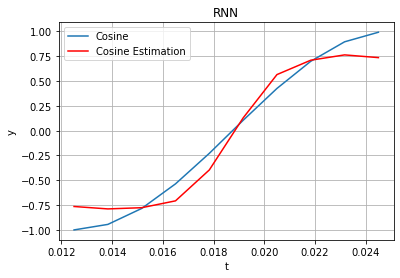

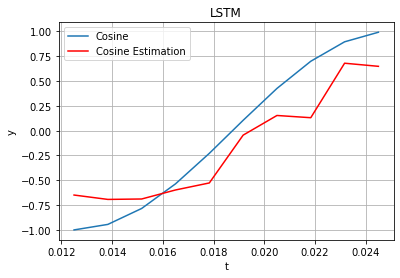

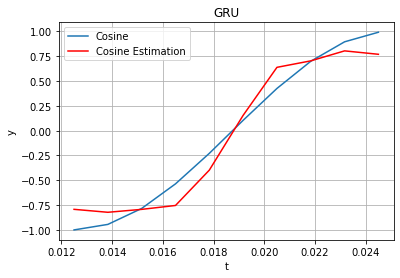

In [132]:
n_test_samples = 1

X_test = np.zeros((n_test_samples, n_features))
y_test = np.zeros((n_test_samples, n_features))

for i in range(n_test_samples):
    t1, t2 = findInterval(T)
    t = np.linspace(t1, t2, n_features)
    X_test[i] = A*np.sin(w*t)
    y_test[i] = A*np.cos(w*t)

X_test = torch.from_numpy(X_test.reshape((n_test_samples, n_features, -1))).float()
y_test = torch.from_numpy(y_test.reshape((n_test_samples, n_features, -1))).float()

trained_model_rnn.eval()
trained_model_lstm.eval()
trained_model_gru.eval()

for x, y in zip(X_test, y_test):
    
    x, y = Variable(x.to(device)), Variable(y.to(device))
    with torch.no_grad():
        _, output_rnn = trained_model_rnn(x, model.init_hidden())
        _, _, output_lstm = trained_model_lstm(x, model.init_hidden(), model.init_cell())
        _, output_gru = trained_model_gru(x, model.init_hidden())
 
    plt.plot(t, y)
    plt.plot(t, output_rnn, color = 'r')
    plt.title('RNN')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(['Cosine','Cosine Estimation'])
    plt.axis('tight')
    plt.grid()
    plt.show()
    
    plt.plot(t, y)
    plt.plot(t, output_lstm, color = 'r')
    plt.title('LSTM')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(['Cosine','Cosine Estimation'])
    plt.axis('tight')
    plt.grid()
    plt.show()
    
    plt.plot(t, y)
    plt.plot(t, output_gru, color = 'r')
    plt.title('GRU')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(['Cosine','Cosine Estimation'])
    plt.axis('tight')
    plt.grid()
    plt.show()

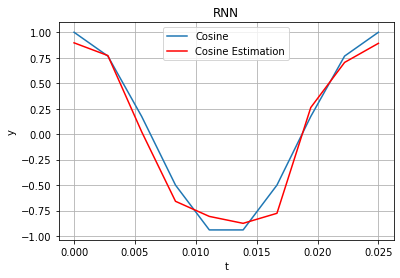

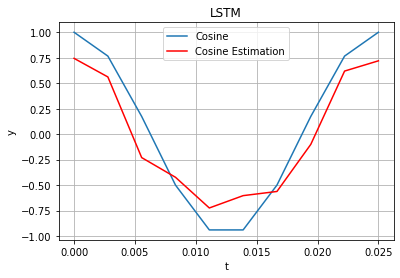

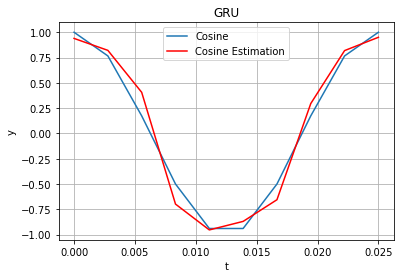

In [130]:
t = np.linspace(0, T, n_features)

x = Variable(torch.from_numpy(np.sin(w*t).reshape(n_features, -1)).float())
y = Variable(torch.from_numpy(np.cos(w*t).reshape(n_features, -1)).float())

with torch.no_grad():
    _, output_rnn = trained_model_rnn(x, model.init_hidden())
    _, _, output_lstm = trained_model_lstm(x, model.init_hidden(), model.init_cell())
    _, output_gru = trained_model_gru(x, model.init_hidden())
    
    plt.plot(t, y)
    plt.plot(t, output_rnn, color = 'r')
    plt.title('RNN')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(['Cosine','Cosine Estimation'])
    plt.axis('tight')
    plt.grid()
    plt.show()
    
    plt.plot(t, y)
    plt.plot(t, output_lstm, color = 'r')
    plt.title('LSTM')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(['Cosine','Cosine Estimation'])
    plt.axis('tight')
    plt.grid()
    plt.show()
    
    plt.plot(t, y)
    plt.plot(t, output_gru, color = 'r')
    plt.title('GRU')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(['Cosine','Cosine Estimation'])
    plt.axis('tight')
    plt.grid()
    plt.show()

>RNN - LSTM & GRU
>
>Τα απλά αναδρομικά νευρωνικά δίκτυα (RNNs) έχουν short-term memory. Αυτό σημαίνει ότι στην περίπτωση που πρέπει να μάθουν μια ακολουθία, όσο μεγαλύτερη είναι αυτή τόσο πιο μεγάλη δυσκολία εμφανίζουν στο να διατηρήσουν την πληροφορία από την αρχή της ακολουθίας έως το τέλος. Ουσιαστικά, κατά το back propagation συμβαίνει αυτό που ονομάζουμε vanishing gradients. Τα gradients είναι οι τιμές οι οποίες συνεισφέρουν στην ανανέωση των βαρών του δικτύου. Όταν μετά από πολλές παραγωγήσεις αποκτήσουν εξαιρετικά μικρές τιμές τότε απλά καταλήγουν να μη συνεισφέρουν στην εκμάθηση του δικτύου. Τα LSTM και GRU δημιουργήθηκαν για την αντιμετώπιση του short-term memory απ'το οποίο πάσχει το απλό RNN. Αυτό που πρακτικά συμβαίνει είναι ότι συντηρείται πληροφορία απ'τα gradients μέσω όμως κάποιας επιλογής, δηλαδή εφαρμόζουν μια διαλογή για το ποια πληροφορία πρέπει να κρατήσω και ποια να πετάξω. Επομένως, τα LSTM και GRU είναι καλά σε προβλήματα επεξεργασίας μεγάλων ακολουθιών.

# 2ο Εργαστήριο:

Για το διάβασμα των δεδομένων του [Free Spoken Digits Dataset](https://github.com/Jakobovski/free-spoken-digit-dataset) μέσω της τροποποιημένης συνάρτησης ```parser()``` έχουμε:

In [18]:
import numpy as np
import librosa
from glob import glob
import os

from sklearn.preprocessing import StandardScaler

def parser(directory):
    # Parse relevant dataset info
    files = glob(os.path.join(directory, '*.wav'))
    fnames = [f.rsplit(str(os.path.sep), 1)[1].split('.')[0].split('_') for f in files]
    ids = [f[2] for f in fnames]
    y = [int(f[0]) for f in fnames]
    speakers = [f[1] for f in fnames]
    _, Fs = librosa.core.load(files[0], sr=None)

    def read_wav(f):
        global Fs
        wav, fs = librosa.core.load(f, sr=None)
        return wav

    # Read all wavs
    wavs = [read_wav(f) for f in files]

    # Extract MFCCs for all wavs
    window = 30 * Fs // 1000
    step = window // 2
    frames = [librosa.feature.mfcc(wav, Fs, n_fft=window, hop_length=window - step, n_mfcc=6).T for wav in wavs]
    # Print dataset info
    print('Total wavs: {}'.format(len(frames)))

    # Standardize data
    scaler = StandardScaler()
    scaler.fit(np.concatenate(frames))
    for i in range(len(frames)):
        frames[i] = scaler.transform(frames[i])

    # Split to train-test
    X_train, y_train, spk_train = [], [], []
    X_test, y_test, spk_test = [], [], []
    test_indices = ['0', '1', '2', '3', '4']
    for idx, frame, label, spk in zip(ids, frames, y, speakers):
        if str(idx) in test_indices:
            X_test.append(frame)
            y_test.append(label)
            spk_test.append(spk)
        else:
            X_train.append(frame)
            y_train.append(label)
            spk_train.append(spk)

    return X_train, X_test, y_train, y_test, spk_train, spk_test

In [19]:
record_dir = os.path.abspath("./free-spoken-digit-dataset-master/recordings/")

X, X_test, y, y_test, spk_train, spk_test = parser(record_dir)

X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

Total wavs: 2000


## Βήμα 9
Χωρίζουμε τα `train` δεδομένα σε νέα `train` και `validation set` με ποσοστό $80\%$ - $20\%$ αντίστοιχα, χρησιμοποιώντας `stratified split`:

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

## Βήμα 10
Φτιάχνουμε ένα python dicitonary το οποίο έχει για κάθε ψηφίο όλα τα δεδομένα που υπάρχουν στο train set και αντιστοιχούν στο ψηφίο αυτό και στην συνέχεια φτιάχνουμε τους πίνακες μετάβασης για τα `HMMs`

In [21]:
from pomegranate import *
import numpy as np

X_digit = {digit : np.concatenate(X_train[y_train==digit]) for digit in range(10)}

n_states = 4 # the number of HMM states
n_mixtures = 5 # the number of Gaussians
initial_prob = 0.5

# your transition matrix
trans_mat = np.diag(initial_prob*np.ones(n_states-1), k=1) + np.diag(initial_prob*np.ones(n_states))
# your starting probability matrix
starts = np.array([1] + [0]*(n_states-1))
# your ending probability matrix
ends = np.array([0]*(n_states-1) + [initial_prob])

## Βήμα 11
Για το train των μοντέλων με χρήση του αλγόριθμου `Expectation Mazimization` έχουμε:

In [22]:
def HMMDigitModel(digit, trans_mat, starts, ends, n_states, n_mixtures, X_train, y_train, X_digit):
    
    dists = [] # list of probability distributions for the HMM states
    for i in range(n_states):
        if(n_mixtures != 1):
            a = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, n_mixtures, 
                                                 np.float_(X_digit[digit]))
        else:
            a = MultivariateGaussianDistribution.from_samples(np.float_(X_digit[digit]))
        dists.append(a)

    # your data: must be a Python list that contains: 
    # -2D lists with the sequences (so its dimension would be num_sequences x seq_length x feature_dimension)
    # But be careful, it is not a numpy array, it is a Python list (so each sequence can have different length)
    
    data = [dt.tolist() for dt in X_train[y_train==digit].tolist()]

    # Define the GMM-HMM
    model = HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends, 
                                          state_names=['s{}'.format(i) for i in range(n_states)])

    # Fit the model using EM
    model.fit(data, max_iterations=5)
    
    return model

In [23]:
digit_models = []

for digit in range(10):
    digit_models.append(HMMDigitModel(digit, trans_mat, starts, ends, n_states, n_mixtures, X_train, y_train, X_digit))

## Βήμα 12
Με την παρακάτω βοηθητική συνάρτηση για το ```accuracy``` στα set έχουμε:

In [24]:
def prediction(X, models):
    
    y_pred = []
    
    for x in X:
        log_probs = np.array([model.viterbi(x)[0] for model in models])
        y_pred.append(np.argmax(log_probs))
    
    return np.array(y_pred)

def accuracy(y_true, y_pred):
    return sum(np.equal(y_true, y_pred))/y_true.size    

Για την αξιολόγηση και την βελτιστοποίηση των παραμέτρων στο `validation set`:

In [25]:
y_pred_val = prediction(X_val, digit_models)
print("Validation set accuracy =", accuracy(y_val, y_pred_val))

Validation set accuracy = 0.9833333333333333


Για την παραπάνω βελτιστοποίηση έχουμε για το `test set`:

In [26]:
y_pred_test = prediction(X_test, digit_models)
print("Test set accuracy =", accuracy(y_test, y_pred_test))

Test set accuracy = 0.985


>Με την παραπάνω διαδικασία της βελτιστοποίησης των παραμέτρων στο `validation` set, καταφέρνουμε να ελέγξουμε την απόδοση του μοντέλου μας σε δεδομένα τα οποία δεν έχει "ξαναδεί", καθώς παράλληλα όμως τα σύνολα `validation` και `test` να παραμένουν ξένα μεταξύ τους. Στην περίπτωση που δεν ελέγχουμε την απόδοση του μοντέλου στο `validation` set παρα μόνο στο `train` set υπάρχει ο κίνδυνος για `overfitting`.

## Βήμα 13

Για τα Confusion Matrices θα χρησιμοποιήσουμε την παρακάτω βοηθητική συνάρτηση:

In [27]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

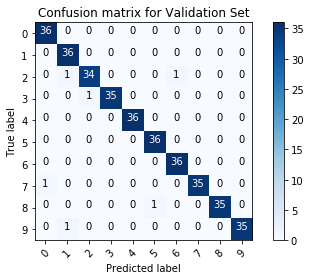

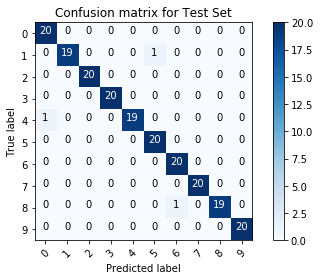

In [28]:
from sklearn.metrics import confusion_matrix

labels = list(range(10))

conf_mat_val = confusion_matrix(y_val, y_pred_val)
plot_confusion_matrix(conf_mat_val, labels, title='Confusion matrix for Validation Set')

conf_mat_test = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(conf_mat_test, labels, title='Confusion matrix for Test Set')

## Βήμα 14

1. Από τα [help scripts](http://mycourses.ntua.gr/projects/goto/index.php/pr_lab2_2019-20_help_scripts.zip) έχουμε:

In [29]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn

class FrameLevelDataset(Dataset):
    def __init__(self, feats, labels):
        
        """
            feats: Python list of numpy arrays that contain the sequence features.
                   Each element of this list is a numpy array of shape seq_length x feature_dimension
            labels: Python list that contains the label for each sequence (each label must be an integer)
        """
        
        self.lengths = [feat.shape[0] for feat in feats]
        
        self.num_sequences = len(feats)
        self.max_sequence_length = max(self.lengths)
        self.feature_dimension = feats[0].shape[1]

        self.feats = self.zero_pad_and_stack(feats)
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(labels).astype('int64')

    def zero_pad_and_stack(self, x):
        """
            This function performs zero padding on a list of features and forms them into a numpy 3D array
            returns
                padded: a 3D numpy array of shape num_sequences x max_sequence_length x feature_dimension
        """
        
        padded = np.array([np.pad(feat.reshape(-1),
                            (0, (self.max_sequence_length - length)*self.feature_dimension), 'constant')
                            .reshape(self.max_sequence_length, self.feature_dimension) 
                            for feat, length in zip(x, self.lengths)])
        return padded

    def __getitem__(self, item):
        return self.feats[item], self.labels[item], self.lengths[item]

    def __len__(self):
        return len(self.feats)

2. Για το απλό `LSTM` δίκτυο έχουμε:

In [110]:
class BasicLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_prob=0.0, 
                 num_layers=1, bidirectional=False, isPackedSequence=False):
        super(BasicLSTM, self).__init__()
        
        self.dropout_prob = dropout_prob
        self.bidirectional = bidirectional
        self.feature_size = hidden_dim * 2 if self.bidirectional else hidden_dim
        self.num_layers = num_layers
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.isPackedSequence = isPackedSequence
        
        # Initialize the LSTM, Dropout, Output layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers,
                                dropout=dropout_prob, batch_first=True, bidirectional= bidirectional)
        
        self.drop = nn.Dropout(p=dropout_prob)
        
        self.fc = nn.Linear(self.feature_size, self.output_dim)
        

    def forward(self, x, lengths):
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index

            lengths: N x 1
         """
        
        N, L, D = x.size()
        
        if self.isPackedSequence:
            x = pack_padded_sequence(x, lengths, batch_first=True)
        
        out, _ = self.lstm(x)
        
        if self.isPackedSequence:
            out, _ = pad_packed_sequence(out, batch_first=True)
        
        dropped = self.drop(out)
        
        last = self.last_timestep(dropped, lengths)
        
        last_outputs = self.fc(last)
        
        # You must have all of the outputs of the LSTM
        # but you need only the last one (that does not exceed the sequence length)
        # To get it use the last_timestep method
        # Then pass it through the remaining network
              
        return last_outputs
    
    

    def last_timestep(self, outputs, lengths, bidirectional=False):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)
        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()

In [31]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}\n\n')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...\n\n')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

4. Για την εκπαίδευση του μοντέλου στο train set και την εκτίμηση στο validation set έχουμε:

In [32]:
import math
import sys

def progress(loss, epoch, batch, batch_size, dataset_size):
    """
    Print the progress of the training for each epoch
    """
    batches = math.ceil(float(dataset_size) / batch_size)
    count = batch * batch_size
    bar_len = 40
    filled_len = int(round(bar_len * count / float(dataset_size)))

    bar = '=' * filled_len + '-' * (bar_len - filled_len)

    status = 'Epoch {}, Loss: {:.4f}'.format(epoch, loss)
    _progress_str = "\r \r [{}] ...{}".format(bar, status)
    sys.stdout.write(_progress_str)
    sys.stdout.flush()

    if batch == batches:
        print()

In [108]:
import torch
from torch.autograd import Variable
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

def train_dataset(_epoch, dataloader, model, loss_function, optimizer):
    
    model.train()
    running_loss = 0.0

    # obtain the model's device ID
    device = next(model.parameters()).device

    for index, batch in enumerate(dataloader, 1):

        # get the inputs (batch)
        inputs, labels, lengths = batch
        
        # Step 1 - move the batch tensors to the right device and also sort by length for packed sequence
        
        if model.isPackedSequence:
            sorted_by_len = sorted(zip(lengths, labels, inputs), key=lambda pair: pair[0], reverse=True) 
            lengths = Variable(torch.tensor([x for x, _, _ in sorted_by_len])).to(device)
            labels = Variable(torch.tensor([x for _, x, _ in sorted_by_len])).to(device)
            inputs = Variable(torch.cat([x.view(1, x.size(0), -1) for _, _, x in sorted_by_len])).to(device)
        else:            
            inputs = Variable(inputs).to(device)
            labels = Variable(labels).to(device)
            lengths = Variable(lengths).to(device)

        optimizer.zero_grad()

        # Step 2 - forward pass: y' = model(x)
        outputs = model(inputs, lengths)

        # Step 3 - compute loss: L = loss_function(y, y')
        loss = loss_function(outputs, labels)

        # Step 4 - backward pass: compute gradient wrt model parameters
        loss.backward()

        # Step 5 - update weights
        optimizer.step()

        running_loss += loss.data.item()

        # print statistics
        progress(loss=loss.data.item(),
                 epoch=_epoch,
                 batch=index,
                 batch_size=dataloader.batch_size,
                 dataset_size=len(dataloader.dataset))

    return running_loss / index


def eval_dataset(dataloader, model, loss_function):
    
    # IMPORTANT: switch to eval mode
    # disable regularization layers, such as Dropout
    model.eval()
    running_loss = 0.0

    y_pred = []  # the predicted labels
    y = []  # the gold labels

    # obtain the model's device ID
    device = next(model.parameters()).device

    # IMPORTANT: in evaluation mode, we don't want to keep the gradients
    # so we do everything under torch.no_grad()
    with torch.no_grad():
        for index, batch in enumerate(dataloader, 1):

            # get the inputs (batch)
            inputs, labels, lengths = batch

            # Step 1 - move the batch tensors to the right device and also sort by length for packed sequence
            
            if model.isPackedSequence:
                sorted_by_len = sorted(zip(lengths, labels, inputs), key=lambda pair: pair[0], reverse=True) 
                lengths = Variable(torch.tensor([x for x, _, _ in sorted_by_len])).to(device)
                labels = Variable(torch.tensor([x for _, x, _ in sorted_by_len])).to(device)
                inputs = Variable(torch.cat([x.view(1, x.size(0), -1) for _, _, x in sorted_by_len])).to(device)
            else:            
                inputs = Variable(inputs).to(device)
                labels = Variable(labels).to(device)
                lengths = Variable(lengths).to(device)
                    
            # Step 2 - forward pass: y' = model(x)
            outputs = model(inputs, lengths)

            # Step 3 - compute loss.
            # We compute the loss only for inspection (compare train/test loss)
            # because we do not actually backpropagate in test time
            loss = loss_function(outputs, labels)

            # Step 4 - make predictions (class = argmax of posteriors)
            _, posibol = torch.max(outputs.data, 1)

            # Step 5 - collect the predictions, gold labels and batch loss
            y_pred.extend(list(posibol.data.cpu().numpy().squeeze()))
            y.extend(list(labels.data.cpu().numpy().squeeze()))


            running_loss += loss.data.item()

    return running_loss / index, (y_pred, y)

In [109]:
from sklearn.metrics import accuracy_score, f1_score
import time

def train_and_val_model(EPOCHS, train_loader, val_loader, model, loss_function, optimizer, early_stopping_limit=0):

    total_train_loss = []
    total_val_loss = []
    
    if early_stopping_limit:
        early_stopping = EarlyStopping(patience=early_stopping_limit, verbose=True)
    
    start_time = time.time()
    
    for epoch in range(1, EPOCHS + 1):
        # train the model for one epoch
        train_dataset(epoch, train_loader, model, loss_function, optimizer)

        # evaluate the performance of the model
        train_loss, (y_train_pred, y_train_gold) = eval_dataset(train_loader, model, loss_function)
        print("Train Set: loss={:.4f}".format(train_loss))

        val_loss, (y_val_pred, y_val_gold) = eval_dataset(val_loader, model, loss_function)
        print("Validation Set: loss={:.4f}, accuracy={:.4f}\n".format(val_loss, 
                                                                      accuracy_score(y_val_gold, y_val_pred)))


        total_train_loss.append(train_loss)
        total_val_loss.append(val_loss)
        
        if early_stopping_limit:
            early_stopping(val_loss, model)
        
            if early_stopping.early_stop:
                print("Early stopping...")
                break

    if early_stopping_limit:        
        # load the last checkpoint with the best model
        model.load_state_dict(torch.load('checkpoint.pt'))
        
    print("\nTotal train and validation time: {:.2f} seconds".format((time.time() - start_time)))
    
    return total_train_loss, total_val_loss


def test_model(test_loader, model, loss_function, set):
    
    test_loss, (y_test_pred, y_test_gold) = eval_dataset(test_loader, model, loss_function)
    print("\n"+set+" Set: loss={:.4f}, accuracy={:.4f}, f1-macro={:.4f}".format(test_loss,
                accuracy_score(y_test_gold, y_test_pred), f1_score(y_test_gold, y_test_pred, average='macro')))
    
    return y_test_pred, y_test_gold

Χρησιμοποιώντας την κλάση ```FrameLevelDataset``` έχουμε:

In [35]:
fld_train = FrameLevelDataset(X_train, y_train.tolist())
fld_val = FrameLevelDataset(X_val, y_val.tolist())
fld_test = FrameLevelDataset(X_test, y_test.tolist())

Για την εκπαίδευση του δικτύου, χωρίζουμε τα `train`, `validation` και `test` set σε batches με $batch\_size = 100$. Εκπαιδεύουμε το δίκτυο για $30$ εποχές και χρησιμοποιώντας ως loss function την ```CrossEntropyLoss()``` (η οποία εκτελεί εσωτερικά ```softmax()```) και για optimizer τον `Stochastic Gradient Descent` (```SGD()```)

In [118]:
from torch.utils.data import DataLoader
import numpy as np
import torch

BATCH_SIZE = 100
EPOCHS = 50

train_loader = DataLoader(fld_train, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(fld_val, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(fld_test, batch_size=BATCH_SIZE, shuffle=True)

INPUT_SIZE = fld_train.feature_dimension

# if your computer has a CUDA compatible gpu use it, otherwise use the cpu
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('DEVICE:', DEVICE)
if torch.cuda.is_available():
    print(  'cuda Version:', torch.version.cuda,
            '\nn_cuda =', torch.cuda.device_count(),
            '\nCuda Name(s):', torch.cuda.get_device_name(0)    )

DEVICE: cuda
cuda Version: 10.0 
n_cuda = 1 
Cuda Name(s): GeForce GTX 1050 Ti


In [119]:
model_basic = BasicLSTM(input_dim=INPUT_SIZE, hidden_dim=20, output_dim=10, num_layers=3).to(DEVICE)

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_basic.parameters(), lr=1)

total_train_loss, total_val_loss = train_and_val_model(EPOCHS, train_loader, val_loader, model_basic, 
                                                        loss_function, optimizer)

 [==========================================] ...Epoch 1, Loss: 2.3195
Train Set: loss=2.3031
Validation Set: loss=2.3024, accuracy=0.1000

 [==========================================] ...Epoch 2, Loss: 2.3016
Train Set: loss=2.3002
Validation Set: loss=2.2999, accuracy=0.1472

 [==========================================] ...Epoch 3, Loss: 2.2866
Train Set: loss=2.2931
Validation Set: loss=2.2929, accuracy=0.1000

 [==========================================] ...Epoch 4, Loss: 2.2498
Train Set: loss=2.2509
Validation Set: loss=2.2487, accuracy=0.2000

 [==========================================] ...Epoch 5, Loss: 2.1006
Train Set: loss=1.9836
Validation Set: loss=1.9704, accuracy=0.2806

 [==========================================] ...Epoch 6, Loss: 1.6025
Train Set: loss=1.6268
Validation Set: loss=1.6846, accuracy=0.3278

 [==========================================] ...Epoch 7, Loss: 2.2627
Train Set: loss=1.7088
Validation Set: loss=1.7619, accuracy=0.3389

 [==================

In [121]:
y_test_pred, y_test_gold = test_model(test_loader, model_basic, loss_function, "Test")


Test Set: loss=0.3288, accuracy=0.9400, f1-macro=0.9405


5. Με την χρήση `Dropout Layer` με πιθανότητα $30\%$ καθώς και `L2 Regularization` (Ridge Regression) έχουμε:

In [125]:
model_drop_l2 = BasicLSTM(input_dim=INPUT_SIZE, hidden_dim=20, output_dim=10, num_layers=3, dropout_prob=0.3).to(DEVICE)

loss_function = torch.nn.CrossEntropyLoss()
optimizer_L2 = torch.optim.SGD(model_drop_l2.parameters(), lr=1, weight_decay=1e-5)


total_train_loss, total_val_loss = train_and_val_model(EPOCHS, train_loader, val_loader, model_drop_l2,
                                                       loss_function, optimizer_L2)

 [==========================================] ...Epoch 1, Loss: 2.3096
Train Set: loss=2.3012
Validation Set: loss=2.3024, accuracy=0.1000

 [==========================================] ...Epoch 2, Loss: 2.3034
Train Set: loss=2.2923
Validation Set: loss=2.2928, accuracy=0.1222

 [==========================================] ...Epoch 3, Loss: 2.2055
Train Set: loss=2.1770
Validation Set: loss=2.1832, accuracy=0.1972

 [==========================================] ...Epoch 4, Loss: 2.0387
Train Set: loss=1.9640
Validation Set: loss=1.9699, accuracy=0.2250

 [==========================================] ...Epoch 5, Loss: 1.9020
Train Set: loss=1.8586
Validation Set: loss=1.8740, accuracy=0.2472

 [==========================================] ...Epoch 6, Loss: 1.6722
Train Set: loss=1.6228
Validation Set: loss=1.6590, accuracy=0.3111

 [==========================================] ...Epoch 7, Loss: 1.6151
Train Set: loss=1.7518
Validation Set: loss=1.8193, accuracy=0.2667

 [==================

In [126]:
y_test_pred, y_test_gold = test_model(test_loader, model_drop_l2, loss_function, "Test")


Test Set: loss=0.2967, accuracy=0.9300, f1-macro=0.9296


>Το `Dropout` είναι μια τεχνική για την απενεργοποίηση νευρώνων του δικτύου με βάση μια δοσμένη πιθανότητα που προκύπτει από την κατανομή _Bernoulli_. Ουσιαστικά, οι νευρώνες ενός δικτύου χωρίς `Dropout` χτίζουν εξαρτήσεις μεταξύ τους κατα την εκπαίδευση και έτσι περιορίζεται η ατομική ισχύς του κάθε νευρώνα οδηγώντας έτσι το δίκτυο σε υπερβολική προσαρμογή στα δεδομένα εκπαίδευσης. Το `Dropout` λοιπόν συμβάλλει στο να μειωθούν μερικώς οι εξαρτήσεις αυτές και κατ' επέκταση στην αποφυγή του `overfitting`. Συνήθως η τεχνική του `Dropout` είναι χρήσιμη σε μεγάλα και πολύπλοκα δίκτυα και γι' αυτό δε διακρίνουμε κατ' ανάγκη βελτίωση στην περίπτωση μας. Να σημειωθεί ακόμη πως συνήθως με τη χρήση `Dropout` απαιτείται μεγαλύτερος αριθμός εποχών για τη σύγκλιση του μοντέλου.

>Το `L2 Regularization` (Ridge Regression) είναι μια τεχνική με την οποία προσθέτουμε στο `loss` ένα regularization term αποτελούμενο από το άθροισμα κάποιων τετραγωνικών όρων πολλαπλασιασμένο με κάποια σταθερά $λ$. Πιο διαισθητικά προσθέτουμε στο `loss` μια ποσότητα που δείχνει πόσο πολύπλοκο είναι το μοντέλο μας (δηλαδή πόσο ειδικό), και καλούμαστε να ελαχιστοποιήσουμε αυτήν την καινούρια ποσότητα. Προσθέτοντας αυτό λοιπόν το _penalty term_ αποφεύγεται σε σημαντικό βαθμό το `overfitting`. Ωστόσο, προσοχή πρέπει να δοθεί στην ποσότητα $λ$ καθώς πολύ μεγάλες τιμές της μπορούν να οδηγήσουν και σε `underfitting` καθώς φτιάχνεται ένα μοντέλο που γενικεύει παραπάνω απ' όσο θα έπρεπε.

6. Με την χρήση `Early Stopping` και `Checkpoints` μέσω της κλάσης `EarlyStopping` που έχουμε φτιάξει παραπάνω έχουμε:

In [131]:
model_stop_check = BasicLSTM(input_dim=INPUT_SIZE, hidden_dim=20, output_dim=10, num_layers=3).to(DEVICE)

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_stop_check.parameters(), lr=1)

total_train_loss, total_val_loss = train_and_val_model(EPOCHS, train_loader, val_loader, model_stop_check, 
                                                        loss_function, optimizer, early_stopping_limit=5)

 [==========================================] ...Epoch 1, Loss: 2.2982
Train Set: loss=2.3012
Validation Set: loss=2.3009, accuracy=0.1028

Validation loss decreased (inf --> 2.300871). Saving model...


 [==========================================] ...Epoch 2, Loss: 2.3095
Train Set: loss=2.2962
Validation Set: loss=2.2965, accuracy=0.1000

Validation loss decreased (2.300871 --> 2.296526). Saving model...


 [==========================================] ...Epoch 3, Loss: 2.2904
Train Set: loss=2.2603
Validation Set: loss=2.2640, accuracy=0.1556

Validation loss decreased (2.296526 --> 2.264000). Saving model...


 [==========================================] ...Epoch 4, Loss: 1.8298
Train Set: loss=2.0954
Validation Set: loss=2.1000, accuracy=0.2028

Validation loss decreased (2.264000 --> 2.099979). Saving model...


 [==========================================] ...Epoch 5, Loss: 1.8326
Train Set: loss=1.6928
Validation Set: loss=1.7378, accuracy=0.3250

Validation loss decreased (2.

In [132]:
y_test_pred, y_test_gold = test_model(test_loader, model_stop_check, loss_function, "Test")


Test Set: loss=0.3463, accuracy=0.9050, f1-macro=0.9044


>Το `Early Stopping` είναι μέθοδος `reguralization` η οποία βοηθάει στην αποφυγή του `overfitting`, μιας και αν παρατηρήσει πως για κάποιο αριθμό επαναλήψεων το `loss` αρχίσει και αυξάνεται τότε σταματάει την διαδικασία της εκπαίδευσης, κρατώντας το μοντέλο με το ελάχιστο `loss` σε ένα αρχείο στο file system ως `checkpoint`(για τη  συγκεκριμένη εκπαίδευση). Παρατηρούμε επίσης πως παίρνουμε ένα ικανοποιήτικο αποτέλεσμα με πολύ μικρότερο χρόνο εκπαίδευσης.

7. Για το `Bidirectional LSTM` δίκτυο έχουμε:

In [138]:
model_bi = BasicLSTM(input_dim=INPUT_SIZE, hidden_dim=20, output_dim=10, num_layers=3, bidirectional=True).to(DEVICE)

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_bi.parameters(), lr=1)


total_train_loss, total_val_loss = train_and_val_model(EPOCHS, train_loader, val_loader, model_bi,
                                                       loss_function, optimizer)

 [==========================================] ...Epoch 1, Loss: 2.3081
Train Set: loss=2.2968
Validation Set: loss=2.2978, accuracy=0.1000

 [==========================================] ...Epoch 2, Loss: 2.2738
Train Set: loss=2.2491
Validation Set: loss=2.2507, accuracy=0.2167

 [==========================================] ...Epoch 3, Loss: 1.9388
Train Set: loss=1.9267
Validation Set: loss=1.9510, accuracy=0.2028

 [==========================================] ...Epoch 4, Loss: 1.7651
Train Set: loss=2.0478
Validation Set: loss=2.0696, accuracy=0.2333

 [==========================================] ...Epoch 5, Loss: 1.4106
Train Set: loss=1.5145
Validation Set: loss=1.6008, accuracy=0.3667

 [==========================================] ...Epoch 6, Loss: 1.3496
Train Set: loss=1.3191
Validation Set: loss=1.4093, accuracy=0.5417

 [==========================================] ...Epoch 7, Loss: 1.0378
Train Set: loss=1.6178
Validation Set: loss=1.8055, accuracy=0.3861

 [==================

In [139]:
y_test_pred, y_test_gold = test_model(test_loader, model_bi, loss_function, "Test")


Test Set: loss=0.1137, accuracy=0.9650, f1-macro=0.9648


>Ως προς την εσωτερική αρχιτεκτονική του δικτύου, το _hidden dimension_ είναι διπλάσιο σε σχέση με πριν καθώς κάθε _hidden layer_ συνδέεται με το επόμενο και προς τις δύο φορές. Πρακτικά αυτό σημαίνει πως το `LSTM` μας δεν "κοιτάει" μόνο στο παρελθόν αλλά και στο μέλλον, έχοντας την ικανότητα να μην κοιτάει μόνο σε προηγούμενες χρονικές στιγμές αλλά και σε επόμενες.

8. **(Bonus)** Με χρήση pack_padded_sequence στην εκπαίδευση του μοντέλου:

In [135]:
model_packpad = BasicLSTM(input_dim=INPUT_SIZE, hidden_dim=20, output_dim=10, num_layers=3,
                          isPackedSequence=True).to(DEVICE)

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_packpad.parameters(), lr=1)


total_train_loss, total_val_loss = train_and_val_model(EPOCHS, train_loader, val_loader, model_packpad,
                                                       loss_function, optimizer)

 [==========================================] ...Epoch 1, Loss: 2.2984
Train Set: loss=2.3022
Validation Set: loss=2.3012, accuracy=0.1000

 [==========================================] ...Epoch 2, Loss: 2.3011
Train Set: loss=2.2975
Validation Set: loss=2.2991, accuracy=0.1000

 [==========================================] ...Epoch 3, Loss: 2.2856
Train Set: loss=2.2659
Validation Set: loss=2.2677, accuracy=0.2028

 [==========================================] ...Epoch 4, Loss: 1.9777
Train Set: loss=1.9182
Validation Set: loss=1.9327, accuracy=0.2556

 [==========================================] ...Epoch 5, Loss: 1.9530
Train Set: loss=1.9337
Validation Set: loss=1.9485, accuracy=0.1583

 [==========================================] ...Epoch 6, Loss: 1.6723
Train Set: loss=1.6651
Validation Set: loss=1.6813, accuracy=0.3722

 [==========================================] ...Epoch 7, Loss: 1.4801
Train Set: loss=1.5358
Validation Set: loss=1.5884, accuracy=0.3750

 [==================

In [136]:
y_test_pred, y_test_gold = test_model(test_loader, model_packpad, loss_function, "Test")


Test Set: loss=0.3133, accuracy=0.9100, f1-macro=0.9091


>Παρατηρούμε πως η ταχύτητα της εκπαίδευσης δεν βελτιώθηκε σε σχέση με τα προηγούμενα μοντέλα (χωρίς την χρήση `pack_padded_sequence()`). Αυτό πιθανώς να οφείλεται στο οτι η πολυπλοκότητα του δικτύου μας δεν είναι μεγάλη, μιας και η συγκεκριμένη τεχνική ευνοεί τα πιο σύνθετα δίκτυα.

Παρατηρούμε πως το καλύτερο μοντέλο (ως προς τις μετρικές `accuracy` και `loss`) είναι αυτό με το `Bidirectional` Δίκτυο.

Για το καλύτερο μοντέλο μετά την εκπαίδευση έχουμε:

In [104]:
def plot_loss(total_epochs, train_loss, val_loss):
    
    plt.title("Train and Validation")
    plt.xlabel("Epochs")
    plt.plot(total_epochs, train_loss, 'o-', color="r", label="Training Loss")
    plt.plot(total_epochs, val_loss, 'o-', color="g", label="Validation Loss")
    plt.xticks(np.arange(0, EPOCHS+1, step=5))
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [140]:
from sklearn.metrics import confusion_matrix

y_val_pred, y_val_gold = test_model(val_loader, model_bi, loss_function, "Validation")
y_test_pred, y_test_gold = test_model(test_loader, model_bi, loss_function, "Test")


Validation Set: loss=0.1581, accuracy=0.9583, f1-macro=0.9581

Test Set: loss=0.1137, accuracy=0.9650, f1-macro=0.9648


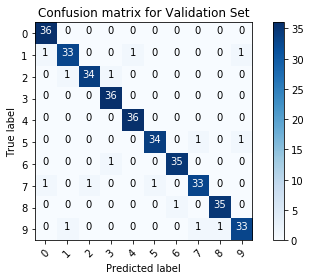

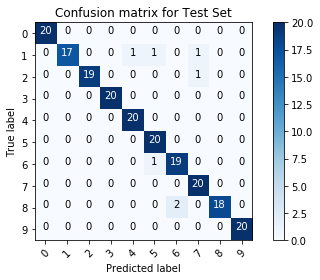

In [141]:
labels = list(range(10))

conf_mat_val = confusion_matrix(y_val_gold, y_val_pred)
plot_confusion_matrix(conf_mat_val, labels, title='Confusion matrix for Validation Set')

conf_mat_test = confusion_matrix(y_test_gold, y_test_pred)
plot_confusion_matrix(conf_mat_test, labels, title='Confusion matrix for Test Set')

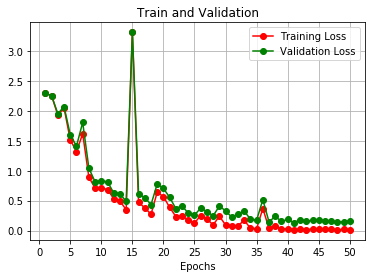

In [142]:
plot_loss(np.arange(1, EPOCHS+1), total_train_loss, total_val_loss)